In [1]:
import pandas as pd
from io import StringIO
pd.set_option('display.max_columns', None)

In [2]:
#Import dataframe
df_C_advanced = pd.read_csv('DataFiles/anthro_stats_tt_2010-22.csv', low_memory=False)
df_pos_pm = pd.read_csv('DataFiles/merged_df_100pos.csv', low_memory=False)

In [3]:
def feet_to_meters(height):
    if isinstance(height, str):
        feet, inches = map(int, height.split('-'))
        total_feet = feet + inches / 12  # Convert inches to feet
        total_meters = total_feet * 0.3048  # Convert feet to meters
        return round(total_meters, 2)  # Round to 2 decimals
    else:
        return None 

In [ ]:
df_pos_pm

In [4]:
# Adding additional advanced metric columns

# Shooting efficiency 
df_pos_pm['FG3A%'] = df_pos_pm['FG3A'] / df_pos_pm['FGA']
df_pos_pm['PTS/FGA'] = df_pos_pm['PTS'] / df_pos_pm['FGA']
df_pos_pm['FG3M/FGM'] = df_pos_pm['FG3M'] / df_pos_pm['FGM']
df_pos_pm['FTA/FGA'] = df_pos_pm['FTA'] / df_pos_pm['FGA']

# True Shooting Percentage
df_pos_pm['TRU%'] = 0.5 * df_pos_pm['PTS'] / (df_pos_pm['FGA'] + 0.475 * df_pos_pm['FTA'])

# Assists to Turnover Ratio
df_pos_pm['AST_TOV'] = df_pos_pm['AST'] / df_pos_pm['TOV']

In [5]:
df_C_advanced.rename(columns={'SeasonYear': 'Year'}, inplace=True)

In [6]:
df_C_advanced

,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,Year
0,2124,Malik,Allen,Malik Allen,PF-C,80.25,6' 8.25'',NaN,NaN,271.0,86.50,7' 2.5'',109.0,9' 1'',NaN,NaN,NaN,2000-01
1,12019,Harold,Arceneaux,Harold Arceneaux,SG-SF,76.50,6' 4.5'',NaN,NaN,219.0,80.50,6' 8.5'',103.0,8' 7'',NaN,NaN,NaN,2000-01
2,12020,Lamont,Barnes,Lamont Barnes,PF-C,80.50,6' 8.5'',NaN,NaN,235.5,87.50,7' 3.5'',108.0,9' 0'',NaN,NaN,NaN,2000-01
3,12131,Mario,Bland,Mario Bland,PF,77.50,6' 5.5'',NaN,NaN,287.0,84.00,7' 0'',103.0,8' 7'',NaN,NaN,NaN,2000-01
4,2056,Primoz,Brezec,Primoz Brezec,C,84.75,7' 0.75'',NaN,NaN,243.0,86.00,7' 2'',110.0,9' 2'',NaN,NaN,NaN,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,1630652,Trevion,Williams,Trevion Williams,C,79.25,6' 7.25'',80.75,6' 8.75'',264.6,86.75,7' 2.75'',108.5,9' 0.50'',10.8,9.0,10.25,2022-23
1548,1631258,Bryson,Williams,Bryson Williams,PF-C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-23
1549,1631109,Mark,Williams,Mark Williams,C,84.00,7' 0.00'',86.00,7' 2.00'',242.4,90.50,7' 6.50'',117.0,9' 9.00'',5.4,9.0,9.75,2022-23
1550,1630592,Jalen,Wilson,Jalen Wilson,SF-PF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-23


In [7]:
merged_df_stats_bio = pd.merge(df_pos_pm, df_C_advanced, on=['PLAYER_ID'], how='inner')

In [8]:
merged_df_stats_bio

,PLAYER_ID,PLAYER_NAME_x,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year_x,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION_x,HEIGHT,WEIGHT_x,FROM_YEAR,TO_YEAR,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,FIRST_NAME,LAST_NAME,PLAYER_NAME_y,POSITION_y,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT_y,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,Year_y
0,199,Reggie Williams,1610612751,NJN,33.0,13,3,10,0.231,48.0,7.0,18.3,0.382,2.2,8.2,0.265,2.2,2.9,0.750,1.2,6.3,7.5,2.4,2.9,1.9,1.0,1.0,7.9,0.2,18.3,1996-97,Regular Season,Georgetown,USA,1987,1,4,34,F-G,6-7,195.0,1987,1996,0.448087,1.000000,0.314286,0.158470,0.464998,0.827586,Reggie,Williams,Reggie Williams,SG,75.25,6' 3.25'',76.00,6' 4'',199.0,81.25,6' 9.25'',103.0,8' 7'',5.3,NaN,NaN,2008-09
1,2062,A.J. Guyton,1610612741,CHI,23.0,33,6,27,0.182,53.6,6.6,16.4,0.406,2.3,5.9,0.391,1.3,1.5,0.833,0.9,2.2,3.1,5.5,2.0,0.8,0.4,0.3,3.0,0.0,16.9,2000-01,Regular Season,Indiana,USA,2000,2,32,11,G,6-2,185.0,2000,2002,0.359756,1.030488,0.348485,0.091463,0.493791,2.750000,A.J.,Guyton,A.J. Guyton,PG-SG,72.75,6' 0.75'',NaN,NaN,175.0,75.75,6' 3.75'',97.5,8' 1.5'',NaN,NaN,NaN,2000-01
2,2062,A.J. Guyton,1610612741,CHI,24.0,45,10,35,0.222,51.8,7.5,20.9,0.361,3.9,10.5,0.374,1.9,2.3,0.815,1.0,2.7,3.8,6.9,3.2,0.9,0.6,0.3,2.0,0.0,20.9,2001-02,Regular Season,Indiana,USA,2000,2,32,11,G,6-2,185.0,2000,2002,0.502392,1.000000,0.520000,0.110048,0.475162,2.156250,A.J.,Guyton,A.J. Guyton,PG-SG,72.75,6' 0.75'',NaN,NaN,175.0,75.75,6' 3.75'',97.5,8' 1.5'',NaN,NaN,NaN,2000-01
3,2062,A.J. Guyton,1610612744,GSW,25.0,2,1,1,0.500,53.3,0.0,25.0,0.000,0.0,6.3,0.000,0.0,0.0,0.000,0.0,0.0,0.0,12.5,6.3,6.3,0.0,6.3,0.0,0.0,0.0,2002-03,Regular Season,Indiana,USA,2000,2,32,11,G,6-2,185.0,2000,2002,0.252000,0.000000,NaN,0.000000,0.000000,1.984127,A.J.,Guyton,A.J. Guyton,PG-SG,72.75,6' 0.75'',NaN,NaN,175.0,75.75,6' 3.75'',97.5,8' 1.5'',NaN,NaN,NaN,2000-01
4,2084,Chris Porter,1610612744,GSW,23.0,51,9,42,0.176,49.8,7.5,19.3,0.389,0.0,0.2,0.000,4.1,6.1,0.667,3.9,4.3,8.2,2.7,2.6,2.0,0.3,1.6,4.8,0.0,19.1,2000-01,Regular Season,Auburn,USA,2000,2,55,4,F,6-7,218.0,2000,2000,0.010363,0.989637,0.000000,0.316062,0.430229,1.038462,Chris,Porter,Chris Porter,SF-PF,77.50,6' 5.5'',NaN,NaN,214.0,81.50,6' 9.5'',103.5,8' 7.5'',NaN,NaN,NaN,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8022,1631102,TyTy Washington Jr.,1610612745,HOU,21.0,31,6,25,0.194,47.4,6.4,17.5,0.363,2.1,8.8,0.238,1.1,2.0,0.556,0.2,4.7,4.9,5.1,1.5,1.6,0.2,0.4,3.2,2.0,15.9,2022-23,Regular Season,Kentucky,USA,2022,1,29,23,G,6-3,195.0,2022,2023,0.502857,0.908571,0.328125,0.114286,0.430894,3.400000,TyTy,Washington Jr.,TyTy Washington Jr.,SG,74.25,6' 2.25'',75.75,6' 3.75'',196.4,80.00,6' 8.00'',99.5,8' 3.50'',12.0,8.50,9.25,2022-23
8023,1631213,Tyrese Martin,1610612737,ATL,24.0,16,10,6,0.625,48.5,6.7,17.0,0.391,0.7,5.2,0.143,1.5,1.5,1.000,3.7,5.2,8.9,1.5,1.5,0.7,0.0,1.5,1.5,0.7,15.6,2022-23,Regular Season,Connecticut,USA,2022,2,51,22,G,6-6,215.0,2022,2022,0.305882,0.917647,0.104478,0.088235,0.440367,1.000000,Tyrese,Martin,Tyrese Martin,SG-SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-23
8024,1631117,Walker Kessler,1610612762,UTA,21.0,74,34,40,0.459,47.5,8.3,11.5,0.720,0.0,0.1,0.333,2.3,4.4,0.516,6.4,10.9,17.3,1.9,1.6,0.7,4.8,0.9,4.7,3.5,18.9,2022-23,Regular Season,Auburn,USA,2022,1,22,24,C,7-0,245.0,2022,2023,0.008696,1.643478,0.000000,0.382609,0.695364,1.187500,Walker,Kessler,Walker Kessler,C,84.25,7' 0.25'',85.00,7' 1.00'',256.0,88.25,7' 4.25'',113.0,9' 5.00'',14.7,8.50,8.50,2022-23
8025,1631111,Wendell Moore Jr.,1610612750,MIN,21.0,29,16

In [9]:
merged_df_stats_bio.drop(columns=['PLAYER_NAME_y', 'POSITION_y','WEIGHT_y', 'Year_y'], inplace=True)


In [10]:
for column in merged_df_stats_bio.columns: 
    if '_x' in column: 
        column_name = column.replace('_x', '')
        merged_df_stats_bio.rename(columns={column:column_name}, inplace=True)

In [11]:
merged_df_stats_bio.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8027 entries, 0 to 8026
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PLAYER_ID              8027 non-null   int64  
 1   PLAYER_NAME            8027 non-null   object 
 2   TEAM_ID                8027 non-null   int64  
 3   TEAM_ABBREVIATION      8027 non-null   object 
 4   AGE                    8027 non-null   float64
 5   GP                     8027 non-null   int64  
 6   W                      8027 non-null   int64  
 7   L                      8027 non-null   int64  
 8   W_PCT                  8027 non-null   float64
 9   MIN                    8027 non-null   float64
 10  FGM                    8027 non-null   float64
 11  FGA                    8027 non-null   float64
 12  FG_PCT                 8027 non-null   float64
 13  FG3M                   8027 non-null   float64
 14  FG3A                   8027 non-null   float64
 15  FG3_

In [12]:
merged_df_stats_bio['Season'] = merged_df_stats_bio['Season'].apply(lambda x:'Regular Season' if x =='Regular%20Season' else x)

In [13]:
merged_df_stats_bio['WINGSPAN'] = merged_df_stats_bio['WINGSPAN'].apply(lambda x: float(x*2.54))

In [14]:
merged_df_stats_bio['STANDING_REACH'] = merged_df_stats_bio['STANDING_REACH'].apply(lambda x: float(x*2.54))
merged_df_stats_bio['HAND_WIDTH'] = merged_df_stats_bio['HAND_WIDTH'].apply(lambda x: float(x*2.54))
merged_df_stats_bio['HAND_LENGTH'] = merged_df_stats_bio['HAND_LENGTH'].apply(lambda x: float(x*2.54))

In [15]:
merged_df_stats_bio['HEIGHT'] = merged_df_stats_bio['HEIGHT'].apply(feet_to_meters)
#'HEIGHT','WINGSPAN','STANDING_REACH','HAND_WIDTH','HAND_LENGTH'

In [16]:
merged_df_stats_bio['WEIGHT'] = merged_df_stats_bio['WEIGHT'].apply(lambda x: float(x/2.205))

In [17]:
merged_df_stats_bio

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,FIRST_NAME,LAST_NAME,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
0,199,Reggie Williams,1610612751,NJN,33.0,13,3,10,0.231,48.0,7.0,18.3,0.382,2.2,8.2,0.265,2.2,2.9,0.750,1.2,6.3,7.5,2.4,2.9,1.9,1.0,1.0,7.9,0.2,18.3,1996-97,Regular Season,Georgetown,USA,1987,1,4,34,F-G,2.01,88.435374,1987,1996,0.448087,1.000000,0.314286,0.158470,0.464998,0.827586,Reggie,Williams,75.25,6' 3.25'',76.00,6' 4'',206.375,6' 9.25'',261.62,8' 7'',5.3,NaN,NaN
1,2062,A.J. Guyton,1610612741,CHI,23.0,33,6,27,0.182,53.6,6.6,16.4,0.406,2.3,5.9,0.391,1.3,1.5,0.833,0.9,2.2,3.1,5.5,2.0,0.8,0.4,0.3,3.0,0.0,16.9,2000-01,Regular Season,Indiana,USA,2000,2,32,11,G,1.88,83.900227,2000,2002,0.359756,1.030488,0.348485,0.091463,0.493791,2.750000,A.J.,Guyton,72.75,6' 0.75'',NaN,NaN,192.405,6' 3.75'',247.65,8' 1.5'',NaN,NaN,NaN
2,2062,A.J. Guyton,1610612741,CHI,24.0,45,10,35,0.222,51.8,7.5,20.9,0.361,3.9,10.5,0.374,1.9,2.3,0.815,1.0,2.7,3.8,6.9,3.2,0.9,0.6,0.3,2.0,0.0,20.9,2001-02,Regular Season,Indiana,USA,2000,2,32,11,G,1.88,83.900227,2000,2002,0.502392,1.000000,0.520000,0.110048,0.475162,2.156250,A.J.,Guyton,72.75,6' 0.75'',NaN,NaN,192.405,6' 3.75'',247.65,8' 1.5'',NaN,NaN,NaN
3,2062,A.J. Guyton,1610612744,GSW,25.0,2,1,1,0.500,53.3,0.0,25.0,0.000,0.0,6.3,0.000,0.0,0.0,0.000,0.0,0.0,0.0,12.5,6.3,6.3,0.0,6.3,0.0,0.0,0.0,2002-03,Regular Season,Indiana,USA,2000,2,32,11,G,1.88,83.900227,2000,2002,0.252000,0.000000,NaN,0.000000,0.000000,1.984127,A.J.,Guyton,72.75,6' 0.75'',NaN,NaN,192.405,6' 3.75'',247.65,8' 1.5'',NaN,NaN,NaN
4,2084,Chris Porter,1610612744,GSW,23.0,51,9,42,0.176,49.8,7.5,19.3,0.389,0.0,0.2,0.000,4.1,6.1,0.667,3.9,4.3,8.2,2.7,2.6,2.0,0.3,1.6,4.8,0.0,19.1,2000-01,Regular Season,Auburn,USA,2000,2,55,4,F,2.01,98.866213,2000,2000,0.010363,0.989637,0.000000,0.316062,0.430229,1.038462,Chris,Porter,77.50,6' 5.5'',NaN,NaN,207.010,6' 9.5'',262.89,8' 7.5'',NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8022,1631102,TyTy Washington Jr.,1610612745,HOU,21.0,31,6,25,0.194,47.4,6.4,17.5,0.363,2.1,8.8,0.238,1.1,2.0,0.556,0.2,4.7,4.9,5.1,1.5,1.6,0.2,0.4,3.2,2.0,15.9,2022-23,Regular Season,Kentucky,USA,2022,1,29,23,G,1.91,88.435374,2022,2023,0.502857,0.908571,0.328125,0.114286,0.430894,3.400000,TyTy,Washington Jr.,74.25,6' 2.25'',75.75,6' 3.75'',203.200,6' 8.00'',252.73,8' 3.50'',12.0,21.590,23.495
8023,1631213,Tyrese Martin,1610612737,ATL,24.0,16,10,6,0.625,48.5,6.7,17.0,0.391,0.7,5.2,0.143,1.5,1.5,1.000,3.7,5.2,8.9,1.5,1.5,0.7,0.0,1.5,1.5,0.7,15.6,2022-23,Regular Season,Connecticut,USA,2022,2,51,22,G,1.98,97.505669,2022,2022,0.305882,0.917647,0.104478,0.088235,0.440367,1.000000,Tyrese,Martin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8024,1631117,Walker Kessler,1610612762,UTA,21.0,74,34,40,0.459,47.5,8.3,11.5,0.720,0.0,0.1,0.333,2.3,4.4,0.516,6.4,10.9,17.3,1.9,1.6,0.7,4.8,0.9,4.7,3.5,18.9,2022-23,Regular Season,Auburn,USA,2022,1,22,24,C,2.13,111.111111,2022,2023,0.008696,1.643478,0.000000,0.382609,0.695364,1.187500,Walker,Kessler,84.25,7' 0.25'',85.00,7' 1.00'',224.155,7' 4.25'',287.02,9' 5.00'',14.7,21.590,21.590
8025,1631111,Wendell Moore Jr.,1610612750,MIN,21.0,29,16,13,0.552,44.6,5.3,12.6,0.419,0.6,5.0,0.118,1.2,1.5,0.800,1.2,4.1,5.3,5.3,2.3,2.3,1.5,0.9,3.8,2.0,12.3,2022-23,Regular Season,Duke,USA,2022,1,26,7,G,1.96,97.505669,2022,2023,0.396825,0.976190,0.113208,0.119048,0.461972,2.304348,Wendell,Moore,76.25,6' 4.

In [18]:
# European countries in basketball sense
europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
  'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
  'United Kingdom', 'Norway', 'Switzerland', 'Belarus', 'Russia', 'Ukraine',
  'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Turkey', 'Israel', 'Albania',
  'Macedonia', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina', 'Iceland']

In [19]:
# Define function for European countries
def filter_europe(df, column_name, europe):
    return df[df[column_name].isin(europe)]

In [20]:
# New object for European players playing at F in regular season games:
europe_C_regular = filter_europe(merged_df_stats_bio, 'COUNTRY', europe)
europe_C_regular = europe_C_regular.loc[europe_C_regular['POSITION'].isin(['C']) & europe_C_regular['Season'].isin(['Regular Season'])]

In [21]:
# Define function for non-european countries
def filter_non_europe(df, column_name='COUNTRY', country_list=europe):
    return df[~df[column_name].isin(europe)]

In [22]:
# New object for Non-europe players playing at F in regular season games:
non_europe_C_regular = filter_non_europe(merged_df_stats_bio)
non_europe_C_regular = non_europe_C_regular.loc[non_europe_C_regular['POSITION'].isin(['C']) & non_europe_C_regular['Season'].isin(['Regular Season'])]

In [23]:
# Number of positions per unique European player:
europe_C_regular.groupby('POSITION')['PLAYER_ID'].nunique()

POSITION
C    14
Name: PLAYER_ID, dtype: int64

In [24]:
europe_C_regular

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,FIRST_NAME,LAST_NAME,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
456,2056,Primoz Brezec,1610612754,IND,22.0,22,10,12,0.455,51.6,4.5,9.3,0.483,0.0,0.0,0.0,4.8,8.0,0.600,5.1,3.9,9.0,1.9,1.9,0.0,2.3,1.3,9.0,0.0,13.8,2001-02,Regular Season,NaN,Slovenia,2000,1,27,9,C,2.16,115.646259,2001,2009,0.000000,1.483871,0.0,0.860215,0.526718,1.000000,Primoz,Brezec,84.75,7' 0.75'',NaN,NaN,218.440,7' 2'',279.40,9' 2'',NaN,NaN,NaN
457,2056,Primoz Brezec,1610612754,IND,23.0,22,15,7,0.682,49.0,6.8,17.3,0.395,0.0,0.5,0.0,5.5,9.1,0.600,5.9,4.5,10.5,1.8,3.2,0.9,1.8,0.9,7.3,0.0,19.1,2002-03,Regular Season,NaN,Slovenia,2000,1,27,9,C,2.16,115.646259,2001,2009,0.028902,1.104046,0.0,0.526012,0.441670,0.562500,Primoz,Brezec,84.75,7' 0.75'',NaN,NaN,218.440,7' 2'',279.40,9' 2'',NaN,NaN,NaN
458,2056,Primoz Brezec,1610612754,IND,24.0,18,11,7,0.611,49.2,8.5,18.3,0.462,0.0,0.0,0.0,2.8,4.2,0.667,3.5,7.0,10.6,2.1,4.2,0.0,2.1,3.5,9.2,0.0,19.7,2003-04,Regular Season,NaN,Slovenia,2000,1,27,9,C,2.16,115.646259,2001,2009,0.000000,1.076503,0.0,0.229508,0.485341,0.500000,Primoz,Brezec,84.75,7' 0.75'',NaN,NaN,218.440,7' 2'',279.40,9' 2'',NaN,NaN,NaN
459,2056,Primoz Brezec,1610612766,CHA,25.0,72,16,56,0.222,50.6,8.6,16.8,0.512,0.0,0.0,0.0,3.6,4.9,0.745,5.0,6.8,11.8,1.9,2.4,0.7,1.2,1.1,4.1,0.0,20.8,2004-05,Regular Season,NaN,Slovenia,2000,1,27,9,C,2.16,115.646259,2001,2009,0.000000,1.238095,0.0,0.291667,0.543720,0.791667,Primoz,Brezec,84.75,7' 0.75'',NaN,NaN,218.440,7' 2'',279.40,9' 2'',NaN,NaN,NaN
460,2056,Primoz Brezec,1610612766,CHA,26.0,79,25,54,0.316,51.1,9.6,18.7,0.517,0.0,0.0,0.0,3.9,5.3,0.732,4.3,6.1,10.4,1.1,2.0,0.4,0.8,1.2,5.4,4.9,23.2,2005-06,Regular Season,NaN,Slovenia,2000,1,27,9,C,2.16,115.646259,2001,2009,0.000000,1.240642,0.0,0.283422,0.546719,0.550000,Primoz,Brezec,84.75,7' 0.75'',NaN,NaN,218.440,7' 2'',279.40,9' 2'',NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,1627751,Jakob Poeltl,1610612761,TOR,27.0,72,26,46,0.361,47.9,9.8,15.5,0.629,0.0,0.0,0.0,3.0,5.0,0.592,5.9,10.5,16.4,4.9,3.1,1.7,2.2,0.9,4.9,4.8,22.5,2022-23,Regular Season,Utah,Austria,2016,1,9,19,C,2.13,117.913832,2016,2023,0.000000,1.451613,0.0,0.322581,0.629371,1.580645,Jakob,Poeltl,84.25,7' 0.25'',85.00,7' 1'',220.345,7' 2.75'',283.21,9' 3.5'',5.8,23.495,26.035
7919,1629674,Neemias Queta,1610612758,SAC,22.0,15,4,11,0.267,47.3,6.7,15.0,0.447,0.0,0.0,0.0,4.3,6.7,0.647,5.5,6.7,12.3,2.4,2.4,0.4,3.2,1.2,7.1,4.7,17.8,2021-22,Regular Season,Utah State,Portugal,2021,2,39,88,C,2.13,112.471655,2021,2023,0.000000,1.186667,0.0,0.446667,0.489482,1.000000,Neemias,Queta,82.75,6' 10.75'',84.25,7' 0.25'',224.155,7' 4.25'',283.21,9' 3.5'',6.3,24.130,27.940
7920,1629674,Neemias Queta,1610612758,SAC,22.0,15,4,11,0.267,47.3,6.7,15.0,0.447,0.0,0.0,0.0,4.3,6.7,0.647,5.5,6.7,12.3,2.4,2.4,0.4,3.2,1.2,7.1,4.7,17.8,2021-22,Regular Season,Utah State,Portugal,2021,2,39,88,C,2.13,112.471655,2021,2023,0.000000,1.186667,0.0,0.446667,0.489482,1.000000,Neemias,Queta,83.25,6'11.25'',84.50,7'0.5'',223.520,7'4.0'',285.75,9'4.5'',7.6,23.495,26.670
7921,1629674,Neemias Queta,1610612758,SAC,23.0,5,1,4,0.200,41.6,8.7,13.0,0.667,0.0,0.0,0.0,0.0,2.9,0.000,7.2,8.7,15.9,1.4,1.4,0.0,2.9,0.0,10.1,2.9,17.4,2022-23,Regular Season,Utah State,Portugal,2021,2,39,88,C,2.13,112.471655,2021,2023,0.000000,1.338462,0.0,0.223077,0.605112,1.000000,Neemias,Queta,82.75,6' 10.75'',84.25,7' 0.

In [25]:
# Number of positions per unique US player:
non_europe_C_regular.groupby('POSITION')['PLAYER_ID'].nunique()

POSITION
C    79
Name: PLAYER_ID, dtype: int64

In [ ]:
import altair as alt
import pandas as pd
import altair_saver


# Annahme: Sie haben zwei DataFrames: data_per_min_europe_regular und data_per_min_usa_regular

# Fügen Sie eine neue Spalte hinzu, um anzuzeigen, ob der Spieler Europäer ist oder nicht
europe_C_regular['Europe'] = 'European'
non_europe_C_regular['Europe'] = 'Non-European'

# Kombinieren Sie die beiden DataFrames
combined_df = pd.concat([europe_C_regular, non_europe_C_regular])

# Liste der Metriken, die geplottet werden sollen
metrics = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 
           'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 
           'PF', 'PTS', 'FG3A%', 'PTS/FGA', 'FG3M/FGM', 'FTA/FGA', 
           'TRU%', 'AST_TOV', 'WINGSPAN', 'STANDING_REACH', 'HAND_LENGTH', 
           'HAND_WIDTH','HEIGHT', 'WEIGHT','BODY_FAT_PCT']

# Liste zum Speichern der Diagramme
charts = []

# Einen Bruchteil des kombinierten DataFrame auswählen
sampled_df = combined_df.sample(frac=0.1)  # Passen Sie den Bruchteil bei Bedarf an

# Für jede Metrik ein gruppiertes Balkendiagramm erstellen und die Diagramme in eine Liste speichern
for metric in metrics:
    chart = alt.Chart(sampled_df).mark_bar().encode(
        x=alt.X('Europe:N', title='Europe'),
        y=alt.Y(f'mean({metric}):Q', title=f'Average {metric}'),
        color=alt.Color('Europe:N', legend=alt.Legend(title='Europe'))
    ).properties(
        title=f'Average {metric} by Europe',
        width=400,
        height=300
    )
    charts.append(chart)

# Diagramme in sechs Zeilen stapeln
alt_row = alt.vconcat(*[alt.hconcat(*charts[i:i+4]) for i in range(0, len(charts), 4)])

# Die Diagramme anzeigen
alt_row


In [27]:
combined_df.groupby('Year').nunique()


,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,FIRST_NAME,LAST_NAME,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,Europe
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01,2,2,2,2,1,2,2,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,1,1,1,2,2,1,2,2,1,2,1,2,1,2,2,2,2,2,2,2,0,0,2,2,2,2,0,0,0,1
2001-02,14,14,12,12,6,14,13,11,14,13,13,14,14,2,5,3,12,13,13,13,13,13,14,11,9,12,10,13,3,12,1,8,3,2,2,12,13,1,5,12,2,10,6,13,2,14,14,13,14,12,8,8,0,0,9,9,7,7,10,0,0,2
2002-03,12,12,10,10,5,8,12,11,12,10,12,11,12,3,5,2,10,11,12,9,10,10,10,11,8,11,9,11,2,11,1,6,3,2,2,12,11,1,5,10,1,9,7,12,3,12,12,12,12,11,7,7,0,0,7,7,6,6,10,0,0,2
2003-04,15,15,12,12,8,15,13,14,15,14,15,13,14,1,5,3,13,14,13,10,13,15,13,12,10,11,12,13,2,14,1,7,4,4,2,12,14,1,4,14,4,10,6,15,1,15,15,15,15,14,9,9,0,0,10,10,10,10,11,0,0,2
2004-05,24,24,17,17,9,20,18,19,23,20,21,21,24,3,5,4,20,19,20,19,19,22,16,18,13,21,13,21,2,22,1,10,8,6,3,17,18,1,7,13,5,12,10,24,3,24,24,21,24,23,15,15,6,6,14,14,12,12,13,0,0,2
2005-06,25,25,18,18,7,19,19,18,24,21,23,24,24,3,5,4,22,23,24,19,22,22,19,17,16,20,17,22,22,24,1,12,10,7,3,19,18,1,6,13,4,12,8,25,3,25,25,24,25,24,14,14,9,9,14,14,12,12,13,0,0,2
2006-07,23,23,18,18,7,18,18,18,22,18,22,23,23,2,4,4,19,21,23,19,19,22,17,15,13,21,16,22,17,20,1,11,7,7,3,17,22,1,4,16,5,11,5,23,2,23,23,21,23,22,12,12,8,8,14,14,10,10,15,0,0,2
2007-08,22,22,19,19,8,18,20,20,21,20,20,21,22,1,2,1,20,20,21,19,20,20,17,15,12,19,16,19,18,21,1,11,8,8,3,18,18,1,5,17,6,12,6,22,1,22,22,20,22,21,12,12,7,7,15,15,10,10,15,0,0,2
2008-09,21,21,16,16,9,17,20,18,20,18,21,21,21,2,3,2,18,19,20,19,17,21,17,16,11,19,14,21,17,20,1,10,7,7,2,16,17,1,4,18,7,11,6,21,2,21,21,20,21,20,13,13,8,8,16,16,11,11,17,0,0,2


In [28]:
europe_C_regular['WEIGHT'].mean()


114.59360502610829

In [29]:
non_europe_C_regular['WEIGHT'].mean()

117.22818669331873

In [30]:
europe_C_regular['WINGSPAN'].mean()

222.57070707070707

In [31]:
non_europe_C_regular['WINGSPAN'].mean()

223.88699040767386

In [32]:
europe_C_regular['BODY_FAT_PCT'].mean()

6.843421052631579

In [33]:
non_europe_C_regular['BODY_FAT_PCT'].mean()

9.504464285714286

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='HEIGHT', y='REB', data=combined_df, hue='Europe'
               ).set(title='REB vs. WINGSPAN');

In [47]:
import altair as alt
import pandas as pd

# Select the columns you want to check for correlation
selected_columns = ['HEIGHT', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 
                    'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','WINGSPAN', 'STANDING_REACH', 'HAND_LENGTH', 
           'HAND_WIDTH','HEIGHT', 'WEIGHT','BODY_FAT_PCT']

# Create a correlation matrix
correlation_matrix = combined_df[selected_columns].corr()

# Convert correlation matrix to tidy format
correlation_tidy = correlation_matrix.stack().reset_index()
correlation_tidy.columns = ['variable1', 'variable2', 'correlation']

# Create heatmap
heatmap = alt.Chart(correlation_tidy).mark_rect().encode(
    x='variable1:O',
    y='variable2:O',
    color='correlation:Q'
).properties(
    title='Correlation Heatmap'
)

# Display heatmap
heatmap

alt.Chart(...)

In [93]:
select_stats = ['WINGSPAN']

#'REB','OREB','DREB','AST','STL','BLK','PTS','HEIGHT','WINGSPAN','BODY_FAT_PCT','FGA'

In [94]:
grouped_df = combined_df.groupby('Year')[select_stats].median().reset_index()

In [95]:
grouped_df

,Year,WINGSPAN
0,2000-01,218.4400
1,2001-02,222.2500
2,2002-03,223.5200
3,2003-04,223.5200
4,2004-05,220.9800
5,2005-06,220.9800
6,2006-07,222.2500
7,2007-08,222.2500
8,2008-09,223.8375
9,2009-10,223.5200


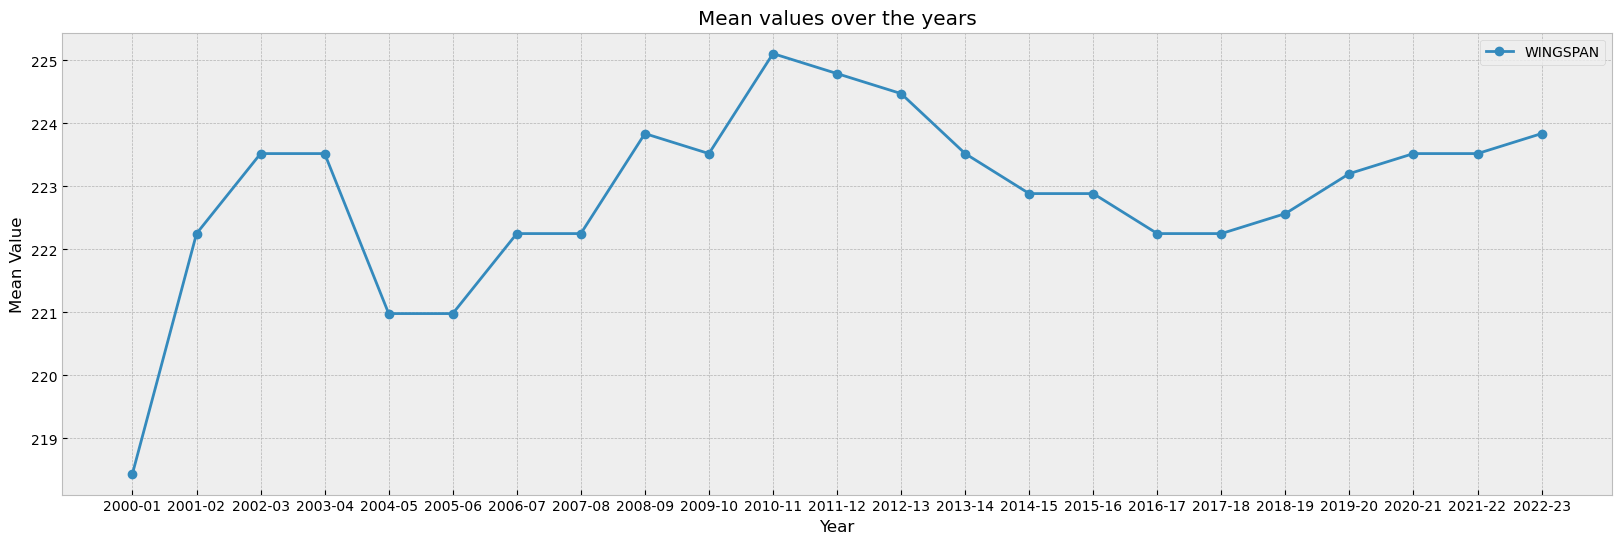

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
for column in select_stats:
    plt.plot(grouped_df['Year'], grouped_df[column], marker='o', label=column)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Mean values over the years')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

In [76]:
groupedUS_df = non_europe_C_regular.groupby('Year')[select_stats].median().reset_index()

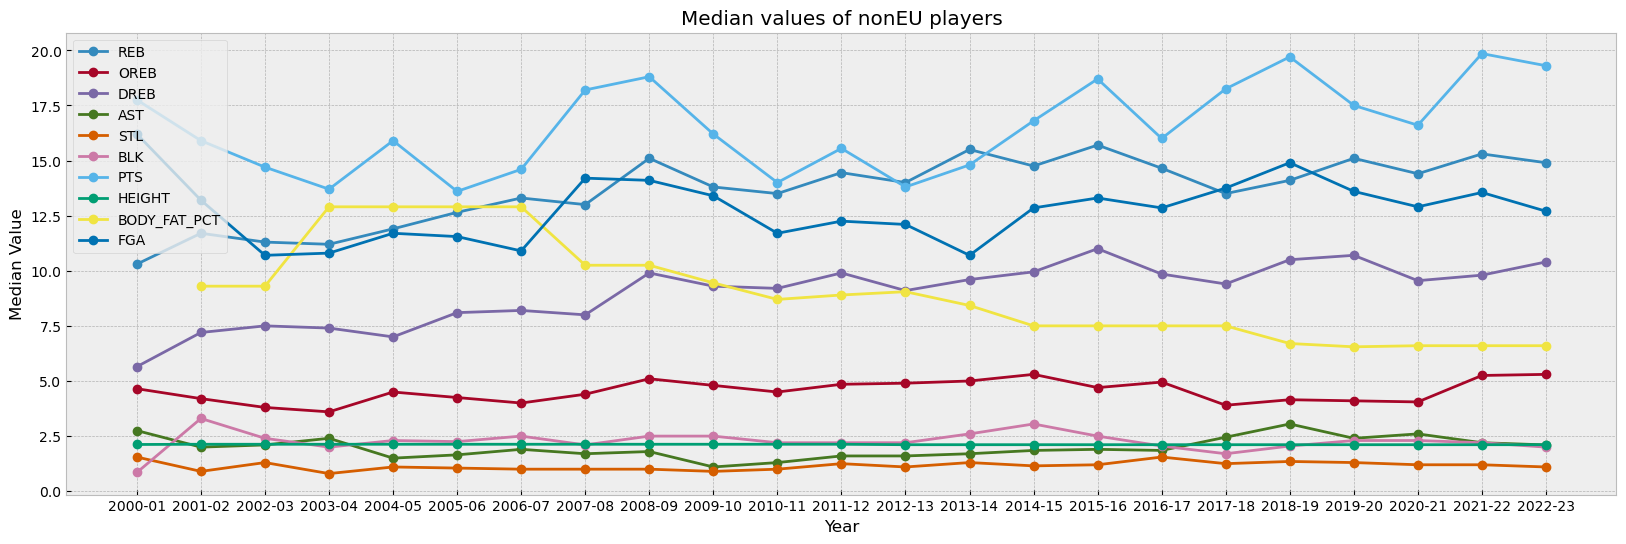

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
for column in select_stats:
    plt.plot(groupedUS_df['Year'], groupedUS_df[column], marker='o', label=column)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Median Value')
plt.title('Median values of nonEU players')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()


In [78]:
groupedEU_df = europe_C_regular.groupby('Year')[select_stats].median().reset_index()

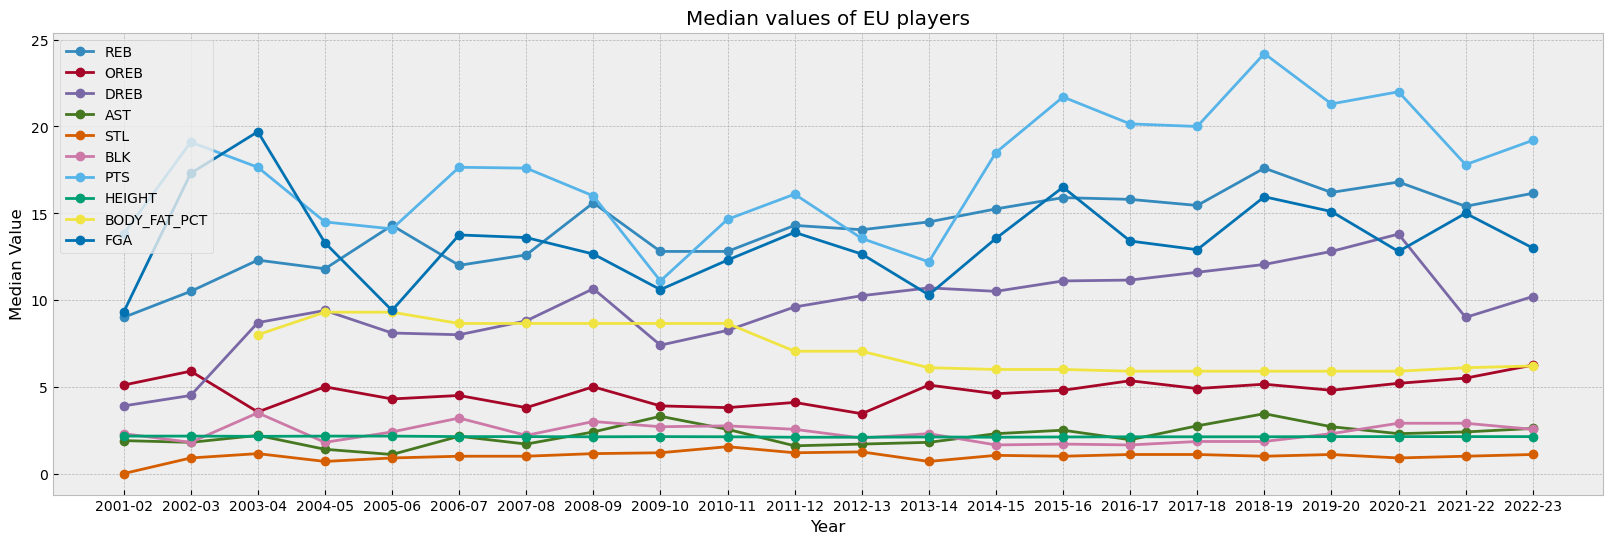

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
for column in select_stats:
    plt.plot(groupedEU_df['Year'], groupedEU_df[column], marker='o', label=column)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Median Value')
plt.title('Median values of EU players')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

In [ ]:
columns_exclude = set(combined_df) = {'PLAYER_ID','PLAYER_NAME','TEAM_ID','TEAM_ABBREVIATION','W','L','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PC','PF','PFD','Year','Season','COLLEGE','COUNTRY','DRAFT_YEAR','DRAFT_ROUND','DRAFT_NUMBER','JERSEY_NUMBER','POSITION','FROM_YEAR','TO_YEAR','FG3A%','PTS/FGA','FG3M/FGM','FTA/FGA','TRU%','FIRST_NAME','LAST_NAME','HEIGHT_WO_SHOES','HEIGHT_WO_SHOES_FT_IN','HEIGHT_W_SHOES','HEIGHT_W_SHOES_FT_IN','WINGSPAN_FT_IN','STANDING_REACH_FT_IN'}
combined_describe = combined_describe[list[columns_exclude]]
combined_describe.describe()

TypeError: unhashable type: 'numpy.ndarray'

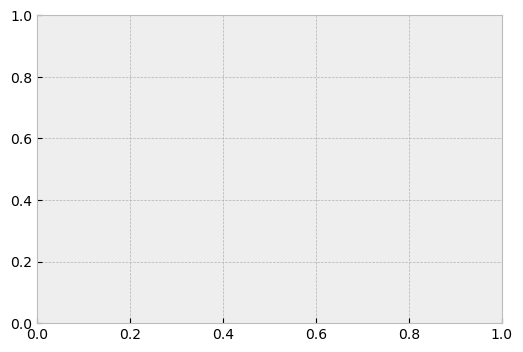

In [46]:
import matplotlib.pyplot as plt 
plt.style.use('bmh') 

plt.figure(figsize=(6, 4))


plt.plot(grouped_df);

plt.xlabel("Year", fontsize = 12)
#plt.ylabel("pH", fontsize = 12)


plt.title("Evolution of C position", fontsize = 15)


plt.show()

PLAYER_ID	PLAYER_NAME	TEAM_ID	TEAM_ABBREVIATION	AGE	GP	W	L	W_PCT	MIN	FGM	FGA	FG_PCT	FG3M	FG3A	FG3_PCT	FTM	FTA	FT_PCT	OREB	DREB	REB	AST	TOV	STL	BLK	BLKA	PF	PFD	PTS	Year	Season	COLLEGE	COUNTRY	DRAFT_YEAR	DRAFT_ROUND	DRAFT_NUMBER	JERSEY_NUMBER	POSITION	HEIGHT	WEIGHT	FROM_YEAR	TO_YEAR	FG3A%	PTS/FGA	FG3M/FGM	FTA/FGA	TRU%	AST_TOV	FIRST_NAME	LAST_NAME	HEIGHT_WO_SHOES	HEIGHT_WO_SHOES_FT_IN	HEIGHT_W_SHOES	HEIGHT_W_SHOES_FT_IN	WINGSPAN	WINGSPAN_FT_IN	STANDING_REACH	STANDING_REACH_FT_IN	BODY_FAT_PCT	HAND_LENGTH	HAND_WIDTH